<a href="https://colab.research.google.com/github/firmansyahtelco/python/blob/main/TheSecondAssingment002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [16]:
ls

PraktikumPython.ipynb         TugasPython10/  TugasPython.ipynb
TheSecondAssingment002.ipynb  TugasPython11/


In [17]:
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [18]:
print("[INFO] loading images...")
imagePaths = paths.list_images("TugasPython11")
data = []
labels = []

[INFO] loading images...


In [19]:
for imagePath in imagePaths:
	image = Image.open(imagePath)
	image = np.array(image.resize((32, 32))) / 255.0 
	data.append(image)
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [20]:
print(labels)

['GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03',

In [21]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [22]:
print(labels)

[[0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 ...
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]]


In [23]:
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(441, 32, 32, 3)
(148, 32, 32, 3)


In [24]:
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(64, (3,3), activation='relu', input_shape=(32,32,3)))
model1.add(MaxPooling2D(2,2))
model1.add(Convolution2D(72, (3,3), activation='relu'))
model1.add(MaxPooling2D(2,2))
#fully connected layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 72)        41544     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 72)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2592)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               259300    
_________________________________________________________________
dense_3 (Dense)              (None, 5)                

In [25]:
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...


In [26]:
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

Epoch 1/25
14/14 [==============================] - 1s 79ms/step - loss: 1.6209 - accuracy: 0.2336 - val_loss: 1.5649 - val_accuracy: 0.2635
Epoch 2/25
14/14 [==============================] - 1s 69ms/step - loss: 1.5185 - accuracy: 0.3605 - val_loss: 1.3832 - val_accuracy: 0.5676
Epoch 3/25
14/14 [==============================] - 1s 69ms/step - loss: 1.4150 - accuracy: 0.4354 - val_loss: 1.2277 - val_accuracy: 0.5676
Epoch 4/25
14/14 [==============================] - 1s 70ms/step - loss: 1.3122 - accuracy: 0.4671 - val_loss: 1.1390 - val_accuracy: 0.5541
Epoch 5/25
14/14 [==============================] - 1s 69ms/step - loss: 1.2075 - accuracy: 0.5283 - val_loss: 1.0123 - val_accuracy: 0.6284
Epoch 6/25
14/14 [==============================] - 1s 70ms/step - loss: 1.0564 - accuracy: 0.5986 - val_loss: 0.9042 - val_accuracy: 0.6554
Epoch 7/25
14/14 [==============================] - 1s 70ms/step - loss: 0.9848 - accuracy: 0.5964 - val_loss: 0.8204 - val_accuracy: 0.7297
Epoch 8/25
14

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


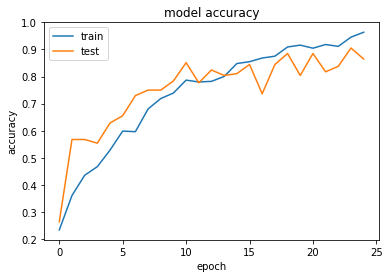

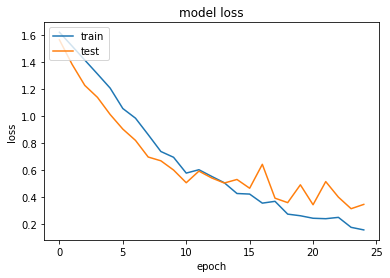

In [27]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [28]:
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_02       0.91      0.89      0.90        35
      GMB_03       0.89      0.93      0.91        27
      GMB_04       0.91      0.70      0.79        30
      GMB_05       0.76      0.96      0.85        27
      GMB_06       0.86      0.86      0.86        29

    accuracy                           0.86       148
   macro avg       0.87      0.87      0.86       148
weighted avg       0.87      0.86      0.86       148



In [29]:
model1.save('firmansyahtelco')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: firmansyahtelco/assets


In [30]:
import cv2
import matplotlib.pyplot as plt
image1='IMG_20200815_203511.jpg'

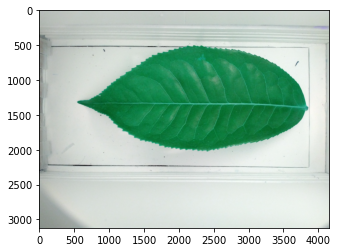

In [31]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()

In [32]:
image_testing = Image.open('IMG_20200815_203511.jpg')
image_testing = np.array(image_testing.resize((32, 32))) / 255.0
image_testing.shape

(32, 32, 3)

In [33]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 32, 32, 3)


In [34]:
output = model1.predict(image_testing, 1,)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[9.9678719e-01 3.2898004e-04 1.1244273e-06 2.0456547e-04 2.6781319e-03]]
['GMB_02']
